In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from scipy import stats
import sklearn.preprocessing
from env import user, password, host
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import os
import csv
import wrangle_zillow

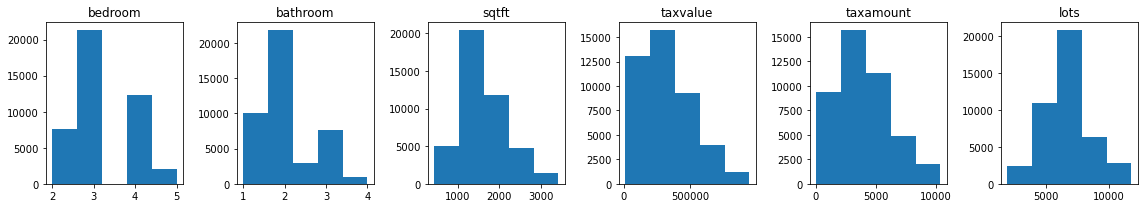

In [2]:
zillow_train,zillow_validate,zillow_test=wrangle_zillow.wrangle_zillow(1.5)

In [5]:
zillow_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24257 entries, 9653 to 47564
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom          24257 non-null  float64
 1   bathroom         24257 non-null  float64
 2   sqtft            24257 non-null  float64
 3   taxvalue         24257 non-null  float64
 4   yearbuilt        24249 non-null  object 
 5   taxamount        24257 non-null  float64
 6   fips             24257 non-null  object 
 7   lots             24257 non-null  float64
 8   zipcode          24247 non-null  object 
 9   assessmentyear   24257 non-null  object 
 10  transactiondate  24257 non-null  object 
dtypes: float64(6), object(5)
memory usage: 2.2+ MB


In [7]:
zillow_train.transactiondate=pd.DatetimeIndex(zillow_train.transactiondate)
zillow_validate.transactiondate=pd.DatetimeIndex(zillow_validate.transactiondate)
zillow_test.transactiondate=pd.DatetimeIndex(zillow_test.transactiondate)

Text(0.5, 1.0, 'Scaled')

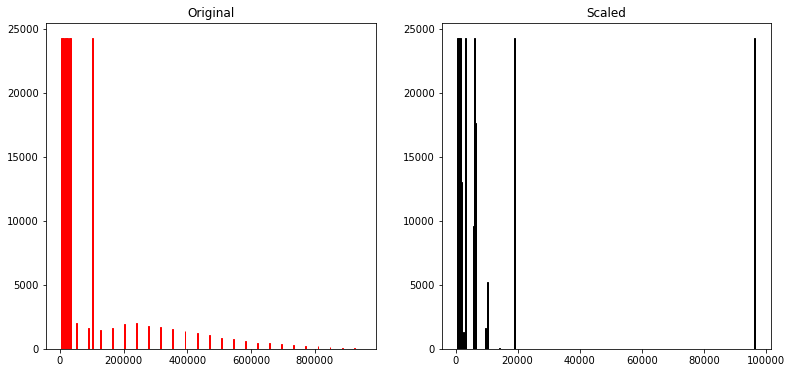

In [8]:
scaler =MinMaxScaler()
cols=['bedroom','bathroom','sqtft','taxvalue']
zillow_train_scaled=zillow_train.copy()
zillow_train_scaled[cols] = scaler.fit_transform(zillow_train[cols])
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(zillow_train, bins=25, ec='red')
plt.title('Original')
plt.subplot(122)
plt.hist(zillow_train_scaled, bins=25, ec='black')
plt.title('Scaled')

In [9]:
zillow_train.columns

Index(['bedroom', 'bathroom', 'sqtft', 'taxvalue', 'yearbuilt', 'taxamount',
       'fips', 'lots', 'zipcode', 'assessmentyear', 'transactiondate'],
      dtype='object')

In [11]:
zillow_train_scaled.columns

Index(['bedroom', 'bathroom', 'sqtft', 'taxvalue', 'yearbuilt', 'taxamount',
       'fips', 'lots', 'zipcode', 'assessmentyear', 'transactiondate'],
      dtype='object')

Text(0, 0.5, 'Count')

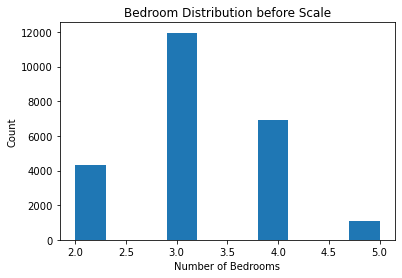

In [13]:
plt.hist(zillow_train.bedroom)
plt.title('Bedroom Distribution before Scale')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

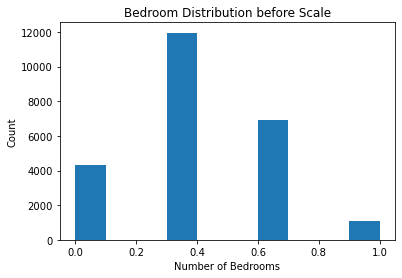

In [14]:
plt.hist(zillow_train_scaled.bedroom)
plt.title('Bedroom Distribution after Scale')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

In [16]:
scaler.inverse_transform(zillow_train_scaled[cols])

array([[3.00000e+00, 3.00000e+00, 2.62000e+03, 6.15795e+05],
       [2.00000e+00, 1.00000e+00, 9.17000e+02, 2.28431e+05],
       [5.00000e+00, 2.00000e+00, 1.51300e+03, 7.13510e+04],
       ...,
       [4.00000e+00, 2.00000e+00, 2.39200e+03, 3.45196e+05],
       [3.00000e+00, 1.00000e+00, 1.21200e+03, 5.32530e+04],
       [2.00000e+00, 1.00000e+00, 7.78000e+02, 2.43431e+05]])

In [24]:
def visualize_scaler(scaler, df, cols, bins):
    fig, axs = plt.subplots(len(cols), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[cols] = scaler.fit_transform(df[cols])
    for (ax1, ax2), col in zip(axs, cols):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

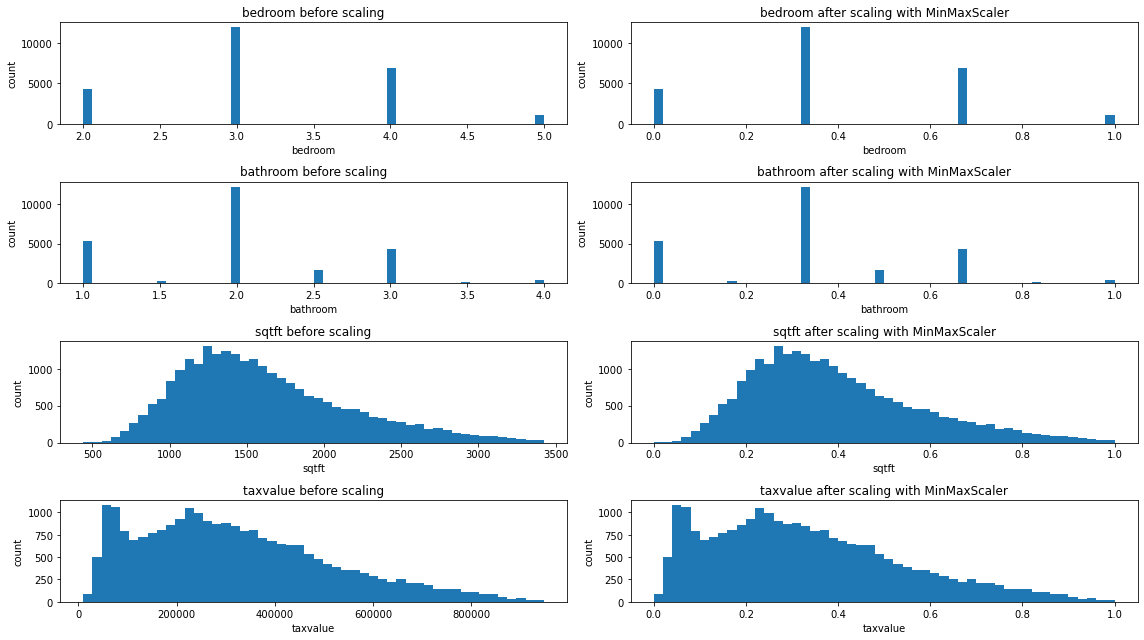

In [25]:
visualize_scaler(MinMaxScaler(),zillow_train,cols,50)

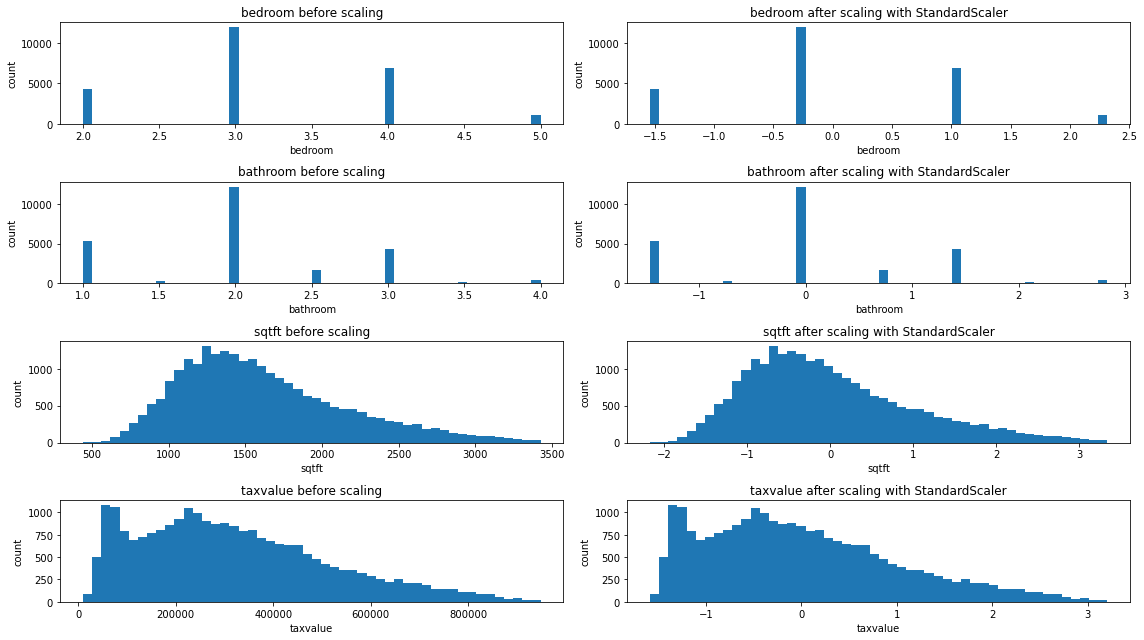

In [26]:
visualize_scaler(StandardScaler(),zillow_train,cols,50)

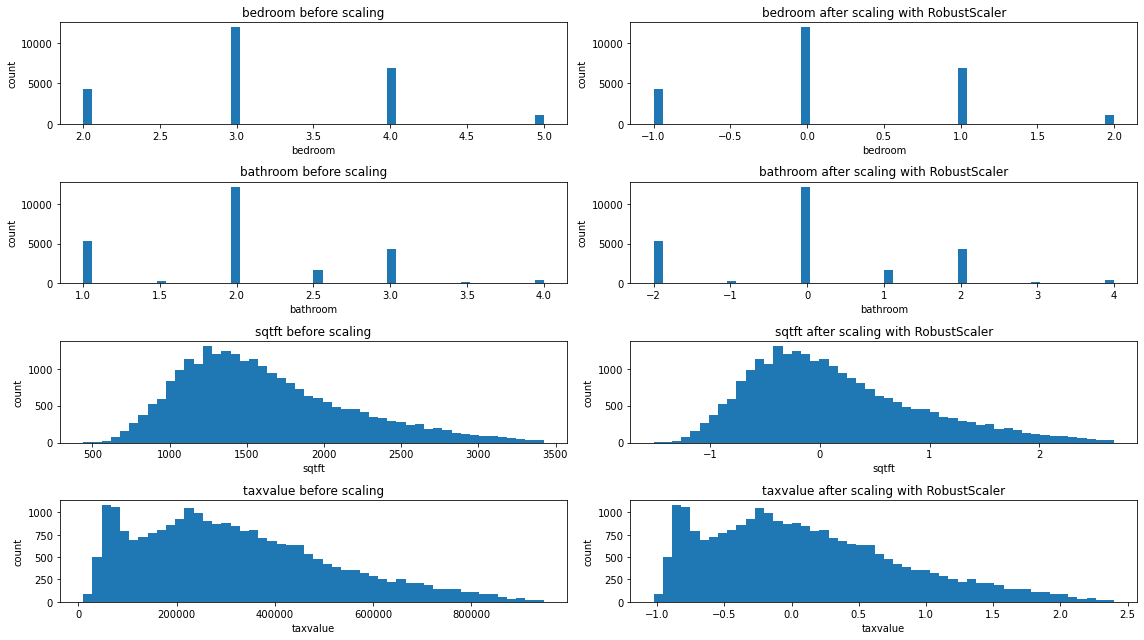

In [27]:
visualize_scaler(RobustScaler(),zillow_train,cols,50)

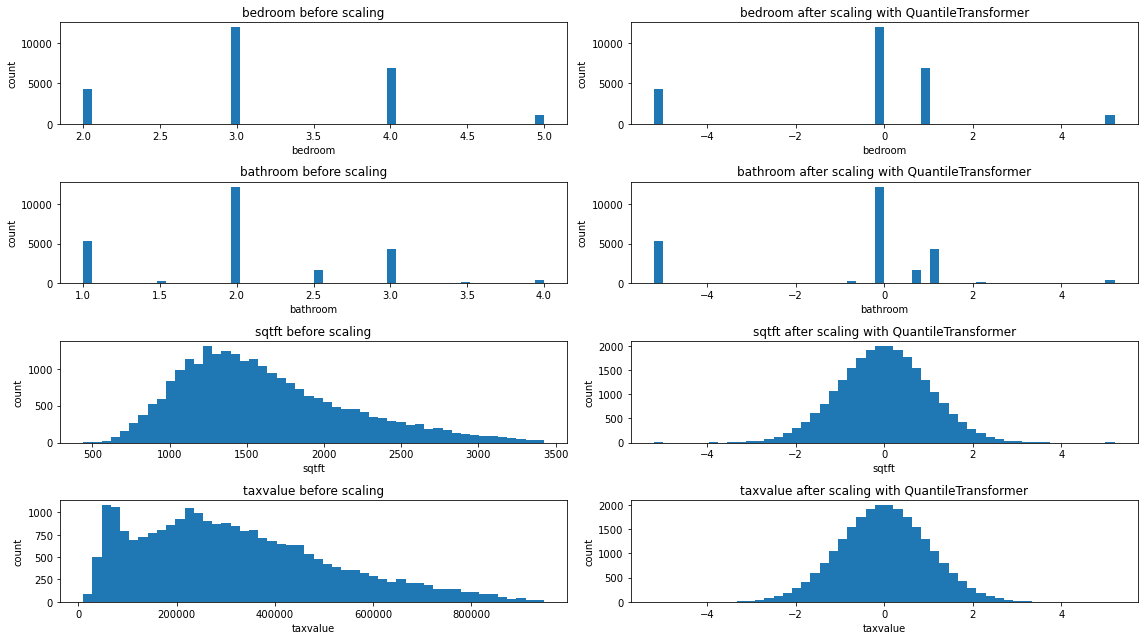

In [29]:
visualize_scaler(QuantileTransformer(output_distribution='normal'),zillow_train,cols,50)

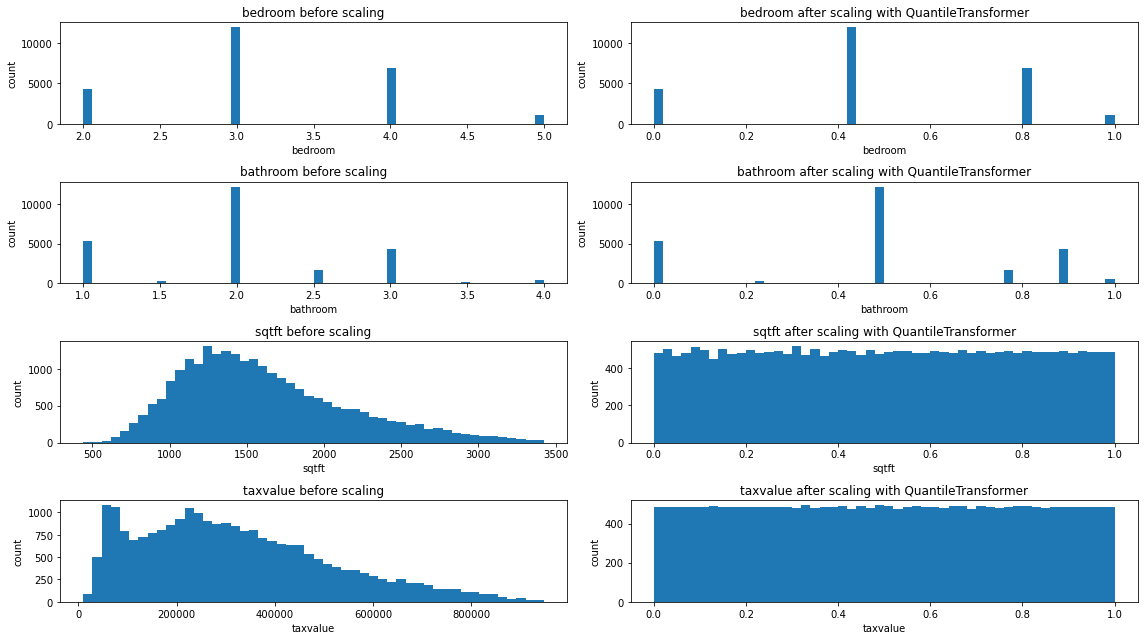

In [30]:
visualize_scaler(QuantileTransformer(),zillow_train,cols,50)

In [36]:
def scale(scaler,zillow_train,zillow_validate,zillow_test,cols=['bedroom','bathroom','sqtft','taxvalue'],return_scaler=True):
    zillow_train,zillow_validate,zillow_test=wrangle_zillow.wrangle_zillow(1.5)
    zillow_train.transactiondate=pd.DatetimeIndex(zillow_train.transactiondate)
    zillow_validate.transactiondate=pd.DatetimeIndex(zillow_validate.transactiondate)
    zillow_test.transactiondate=pd.DatetimeIndex(zillow_test.transactiondate)
    zillow_train_scaled=zillow_train.copy()
    zillow_validate_scaled=zillow_validate.copy()
    zillow_test_scaled=zillow_test.copy()
    scaler=scaler
    zillow_train_scaled[cols] = scaler.fit_transform(zillow_train[cols])
    zillow_validate_scaled[cols] = scaler.fit_transform(zillow_validate[cols])
    zillow_test_scaled[cols] = scaler.fit_transform(zillow_test[cols])
    return scaler, zillow_train_scaled,zillow_validate_scaled, zillow_test_scaled
    

In [41]:
scaler, zillow_train_scaled, zillow_validate_scaled, zillow_test_scaled=scale(MinMaxScaler(),zillow_train,zillow_validate, zillow_test)

In [49]:
zillow_train_scaled

,bedroom,bathroom,sqtft,taxvalue,yearbuilt,taxamount,fips,lots,zipcode,assessmentyear,transactiondate
9653,0.333333,0.666667,0.730563,0.646069,1980.0,7156.69,6037.0,6726.0,96336.0,2016.0,2017-03-10
27478,0.000000,0.000000,0.159853,0.233115,1918.0,2872.13,6037.0,5005.0,96216.0,2016.0,2017-05-17
23921,1.000000,0.333333,0.359584,0.065658,1971.0,779.30,6111.0,8383.0,96351.0,2016.0,2017-04-28
26263,0.333333,0.333333,0.221180,0.246452,1959.0,3049.45,6037.0,6610.0,96489.0,2016.0,2017-05-23
36764,0.333333,0.333333,0.235925,0.125109,1969.0,1688.51,6037.0,5775.0,96159.0,2016.0,2017-06-30
...,...,...,...,...,...,...,...,...,...,...,...
5108,0.333333,0.333333,0.365952,0.143656,1938.0,2178.49,6037.0,6710.0,96514.0,2016.0,2017-01-25
37436,0.000000,0.000000,0.202748,0.156243,1948.0,2296.84,6037.0,5683.0,96197.0,2016.0,2017-06-29
24363,0.666667,0.333333,0.654155,0.357593,1950.0,4180.87,6037.0,9183.0,96295.0,2016.0,2017-05-12
24885,0.333333,0.000000,0.258713,0.046364,1947.0,915.10,6037.0,6139.0,96531.0,2016.0,2017-05-11
